In [213]:
from pycoingecko import CoinGeckoAPI
import pandas_datareader as web
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import minimize
from scipy.stats import norm
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from polygon import WebSocketClient, CRYPTO_CLUSTER
from polygon import RESTClient
from datetime import datetime
import quandl

In [109]:
sol_df = pd.read_csv('./data/coincodex/solana_2020-12-1_2022-1-17.csv')
sol_df['Date'] = pd.to_datetime(sol_df['Date'])
sol_df.set_index('Date',inplace=True)
sol_df = sol_df.iloc[::-1]
sol_df = sol_df[sol_df.index >= datetime(2020,12,1)]
sol_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,1.962367,2.124009,1.932501,1.977516,3.660476e+07,9.317730e+07
2020-12-02,1.971593,2.172160,1.958971,2.112355,4.113504e+07,9.605753e+07
2020-12-03,2.114955,2.215764,2.080785,2.098405,5.240107e+07,9.900875e+07
2020-12-04,2.098405,2.110675,1.841711,1.856668,3.959888e+07,9.232912e+07
2020-12-05,1.851515,1.977514,1.827409,1.977440,3.075995e+07,8.849150e+07
...,...,...,...,...,...,...
2022-01-12,140.227900,152.942365,138.487796,151.644100,2.327960e+09,4.515453e+10
2022-01-13,151.525600,157.315077,145.866507,146.143700,2.907038e+09,4.703158e+10
2022-01-14,145.835000,150.435737,142.296100,146.287610,2.880095e+09,4.601520e+10


In [110]:
avax_df = pd.read_csv('./data/coincodex/avalanche_2020-12-1_2022-1-17.csv')
avax_df['Date'] = pd.to_datetime(avax_df['Date'])
avax_df.set_index('Date',inplace=True)
avax_df = avax_df.iloc[::-1]
avax_df = avax_df[avax_df.index >= datetime(2020,12,1)]
avax_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,3.704887,3.816191,3.511738,3.576271,3.049215e+07,8.937501e+07
2020-12-02,3.561117,3.844096,3.529078,3.745825,3.153232e+07,9.129669e+07
2020-12-03,3.738596,3.889555,3.723324,3.819472,2.743838e+07,9.302110e+07
2020-12-04,3.820087,3.865357,3.516727,3.556966,2.436822e+07,9.053740e+07
2020-12-05,3.534045,3.718005,3.513630,3.630332,2.445545e+07,8.940219e+07
...,...,...,...,...,...,...
2022-01-12,89.535700,96.522283,88.942000,95.857500,1.156957e+09,2.271101e+10
2022-01-13,95.980700,96.996574,89.663700,89.676900,1.163556e+09,2.287382e+10
2022-01-14,89.491900,91.560474,87.444841,90.260713,1.024667e+09,2.196741e+10


In [111]:
eth_df = pd.read_csv('./data/coincodex/ethereum_2018-12-1_2022-1-17.csv')
eth_df['Date'] = pd.to_datetime(eth_df['Date'])
eth_df.set_index('Date',inplace=True)
eth_df = eth_df.iloc[::-1]
eth_df = eth_df[eth_df.index >= datetime(2020,12,1)]
eth_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,616.183534,634.754677,573.516677,589.814467,2.780131e+10,6.856145e+10
2020-12-02,586.970964,602.820207,578.508054,598.357253,2.929685e+10,6.742433e+10
2020-12-03,598.537314,621.269532,588.649832,616.904853,1.884975e+10,6.886717e+10
2020-12-04,616.551824,618.836053,569.723831,571.978333,1.857875e+10,6.789766e+10
2020-12-05,568.823975,596.047597,563.491212,595.548506,1.865798e+10,6.679529e+10
...,...,...,...,...,...,...
2022-01-12,3239.918200,3409.925100,3215.343755,3374.303800,2.211066e+10,3.934373e+11
2022-01-13,3373.881300,3409.041571,3248.202399,3256.141500,2.203296e+10,3.965815e+11
2022-01-14,3245.768700,3334.329197,3202.761300,3314.714162,1.903904e+10,3.903704e+11


In [112]:
ftm_df = pd.read_csv('./data/coincodex/fantom_2018-12-1_2022-1-17.csv')
ftm_df['Date'] = pd.to_datetime(ftm_df['Date'])
ftm_df.set_index('Date',inplace=True)
ftm_df = ftm_df.iloc[::-1]
ftm_df = ftm_df[ftm_df.index >= datetime(2020,12,1)]
ftm_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,0.021029,0.023130,0.020284,0.020539,1.651956e+07,5.498381e+07
2020-12-02,0.020468,0.022986,0.020120,0.022646,1.459215e+07,5.454534e+07
2020-12-03,0.022651,0.024370,0.022395,0.022888,1.778216e+07,5.895707e+07
2020-12-04,0.022891,0.023116,0.020812,0.021042,1.551331e+07,5.587561e+07
2020-12-05,0.020936,0.022591,0.020684,0.022497,1.163651e+07,5.536606e+07
...,...,...,...,...,...,...
2022-01-12,2.588340,3.005004,2.588340,2.932180,3.900513e+09,7.191380e+09
2022-01-13,2.939825,3.138178,2.803410,3.004518,4.870869e+09,7.578404e+09
2022-01-14,2.996067,3.053992,2.816005,2.957646,4.883717e+09,7.524089e+09


In [113]:
luna_terra_df = pd.read_csv('./data/coincodex/luna_2020-12-1_2022-1-17.csv')
luna_terra_df['Date'] = pd.to_datetime(luna_terra_df['Date'])
luna_terra_df.set_index('Date',inplace=True)
luna_terra_df = luna_terra_df.iloc[::-1]
luna_terra_df = luna_terra_df[luna_terra_df.index >= datetime(2020,12,1)]
luna_terra_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,0.395484,0.425683,0.382684,0.389358,2.883559e+06,1.537108e+08
2020-12-02,0.389144,0.407204,0.382617,0.406560,2.197633e+06,1.512835e+08
2020-12-03,0.407661,0.500521,0.407661,0.500521,4.356896e+06,1.725738e+08
2020-12-04,0.501514,0.506210,0.451157,0.452620,8.032839e+06,1.835933e+08
2020-12-05,0.451275,0.507713,0.447554,0.507713,4.309684e+06,1.849394e+08
...,...,...,...,...,...,...
2022-01-12,72.733900,82.941200,71.822500,82.391900,9.076688e+08,2.743757e+10
2022-01-13,82.016300,83.823768,77.558741,78.292500,1.087269e+09,2.895020e+10
2022-01-14,78.185900,82.904873,75.924637,81.729617,9.857812e+08,2.861373e+10


In [114]:
matic_df = pd.read_csv('./data/coincodex/matic-network_2019-12-1_2022-1-17.csv')
matic_df['Date'] = pd.to_datetime(matic_df['Date'])
matic_df.set_index('Date',inplace=True)
matic_df = matic_df.iloc[::-1]
matic_df = matic_df[matic_df.index >= datetime(2020,12,1)]
matic_df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2020-12-01,0.019603,0.020060,0.018155,0.018725,3.137358e+07,9.137390e+07
2020-12-02,0.018653,0.019466,0.018419,0.019348,2.647399e+07,9.097363e+07
2020-12-03,0.019362,0.020940,0.019056,0.020795,2.639941e+07,9.452948e+07
2020-12-04,0.020795,0.021043,0.018748,0.018869,3.198054e+07,9.522180e+07
2020-12-05,0.018793,0.019663,0.018384,0.019663,2.902304e+07,9.110158e+07
...,...,...,...,...,...,...
2022-01-12,2.358916,2.441087,2.311362,2.387033,2.538726e+09,1.165257e+10
2022-01-13,2.395786,2.430676,2.244977,2.267512,2.090970e+09,1.164781e+10
2022-01-14,2.260520,2.347063,2.189995,2.339803,1.753179e+09,1.128620e+10


In [115]:
protfolio_six_coins =['eth','sol','matic','ftm','luna','avax']
portfolio_six_weights=[0.40,0.20,0.15,0.10,0.10,0.05]


In [116]:
coin_comp = pd.concat([eth_df['Open'],sol_df['Open'],matic_df['Open'],ftm_df['Open'],luna_terra_df['Open'],avax_df['Open']],axis=1)
coin_comp.head()

,Open,Open,Open,Open,Open,Open
Date,,,,,,
2020-12-01,616.183534,1.962367,0.019603,0.021029,0.395484,3.704887
2020-12-02,586.970964,1.971593,0.018653,0.020468,0.389144,3.561117
2020-12-03,598.537314,2.114955,0.019362,0.022651,0.407661,3.738596
2020-12-04,616.551824,2.098405,0.020795,0.022891,0.501514,3.820087
2020-12-05,568.823975,1.851515,0.018793,0.020936,0.451275,3.534045


In [117]:
coin_comp.columns = protfolio_six_coins
coin_comp

,eth,sol,matic,ftm,luna,avax
Date,,,,,,
2020-12-01,616.183534,1.962367,0.019603,0.021029,0.395484,3.704887
2020-12-02,586.970964,1.971593,0.018653,0.020468,0.389144,3.561117
2020-12-03,598.537314,2.114955,0.019362,0.022651,0.407661,3.738596
2020-12-04,616.551824,2.098405,0.020795,0.022891,0.501514,3.820087
2020-12-05,568.823975,1.851515,0.018793,0.020936,0.451275,3.534045
...,...,...,...,...,...,...
2022-01-12,3239.918200,140.227900,2.358916,2.588340,72.733900,89.535700
2022-01-13,3373.881300,151.525600,2.395786,2.939825,82.016300,95.980700
2022-01-14,3245.768700,145.835000,2.260520,2.996067,78.185900,89.491900


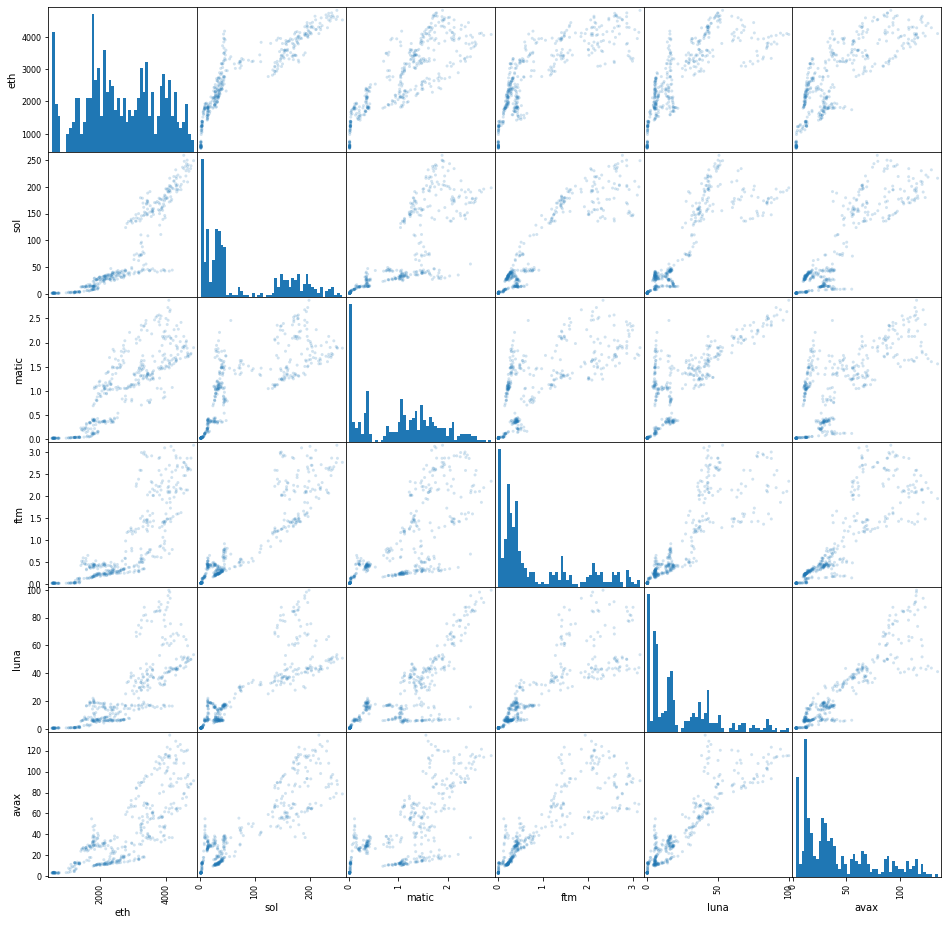

In [118]:
scatter_matrix(coin_comp, figsize=(16,16),alpha=0.2,hist_kwds={'bins':50});

In [120]:
# =['eth','sol','matic','ftm','luna','avax']

eth_df['returns'] = (eth_df['Close']/ eth_df['Close'].shift(1)) -1
sol_df['returns'] = (sol_df['Close']/ sol_df['Close'].shift(1)) -1
matic_df['returns'] = (matic_df['Close']/ matic_df['Close'].shift(1)) -1
ftm_df['returns'] = (ftm_df['Close']/ ftm_df['Close'].shift(1)) -1
luna_terra_df['returns'] = (luna_terra_df['Close']/ luna_terra_df['Close'].shift(1)) -1
avax_df['returns'] = avax_df['Close'].pct_change(1)
eth_df

,Open,High,Low,Close,Volume,Market Cap,returns
Date,,,,,,,
2020-12-01,616.183534,634.754677,573.516677,589.814467,2.780131e+10,6.856145e+10,NaN
2020-12-02,586.970964,602.820207,578.508054,598.357253,2.929685e+10,6.742433e+10,0.014484
2020-12-03,598.537314,621.269532,588.649832,616.904853,1.884975e+10,6.886717e+10,0.030998
2020-12-04,616.551824,618.836053,569.723831,571.978333,1.857875e+10,6.789766e+10,-0.072826
2020-12-05,568.823975,596.047597,563.491212,595.548506,1.865798e+10,6.679529e+10,0.041208
...,...,...,...,...,...,...,...
2022-01-12,3239.918200,3409.925100,3215.343755,3374.303800,2.211066e+10,3.934373e+11,0.042092
2022-01-13,3373.881300,3409.041571,3248.202399,3256.141500,2.203296e+10,3.965815e+11,-0.035018
2022-01-14,3245.768700,3334.329197,3202.761300,3314.714162,1.903904e+10,3.903704e+11,0.017988


In [121]:
sol_df

,Open,High,Low,Close,Volume,Market Cap,returns
Date,,,,,,,
2020-12-01,1.962367,2.124009,1.932501,1.977516,3.660476e+07,9.317730e+07,NaN
2020-12-02,1.971593,2.172160,1.958971,2.112355,4.113504e+07,9.605753e+07,0.068186
2020-12-03,2.114955,2.215764,2.080785,2.098405,5.240107e+07,9.900875e+07,-0.006604
2020-12-04,2.098405,2.110675,1.841711,1.856668,3.959888e+07,9.232912e+07,-0.115200
2020-12-05,1.851515,1.977514,1.827409,1.977440,3.075995e+07,8.849150e+07,0.065047
...,...,...,...,...,...,...,...
2022-01-12,140.227900,152.942365,138.487796,151.644100,2.327960e+09,4.515453e+10,0.083152
2022-01-13,151.525600,157.315077,145.866507,146.143700,2.907038e+09,4.703158e+10,-0.036272
2022-01-14,145.835000,150.435737,142.296100,146.287610,2.880095e+09,4.601520e+10,0.000985


In [122]:
avax_df

,Open,High,Low,Close,Volume,Market Cap,returns
Date,,,,,,,
2020-12-01,3.704887,3.816191,3.511738,3.576271,3.049215e+07,8.937501e+07,NaN
2020-12-02,3.561117,3.844096,3.529078,3.745825,3.153232e+07,9.129669e+07,0.047411
2020-12-03,3.738596,3.889555,3.723324,3.819472,2.743838e+07,9.302110e+07,0.019661
2020-12-04,3.820087,3.865357,3.516727,3.556966,2.436822e+07,9.053740e+07,-0.068728
2020-12-05,3.534045,3.718005,3.513630,3.630332,2.445545e+07,8.940219e+07,0.020626
...,...,...,...,...,...,...,...
2022-01-12,89.535700,96.522283,88.942000,95.857500,1.156957e+09,2.271101e+10,0.072491
2022-01-13,95.980700,96.996574,89.663700,89.676900,1.163556e+09,2.287382e+10,-0.064477
2022-01-14,89.491900,91.560474,87.444841,90.260713,1.024667e+09,2.196741e+10,0.006510


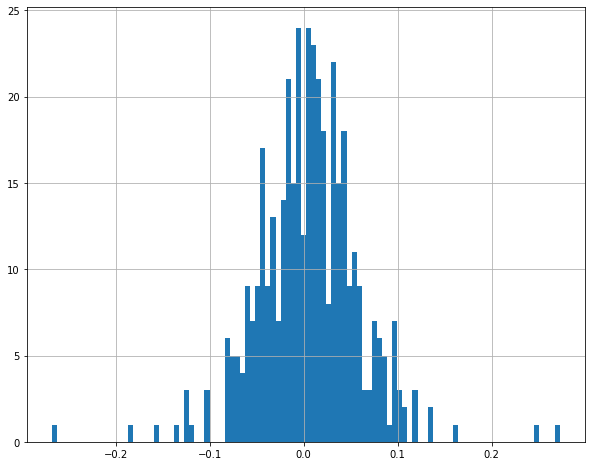

In [231]:
eth_df['returns'].hist(bins=100,label='ETH VOL',figsize=(10,8))

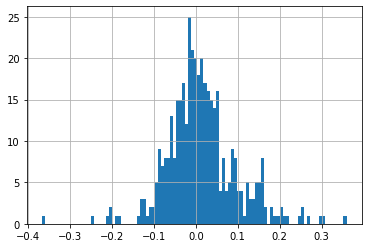

In [232]:
sol_df['returns'].hist(bins=100)

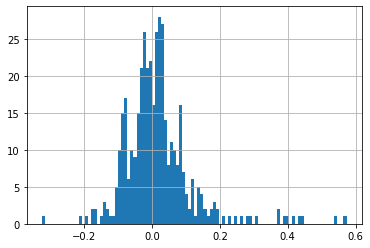

In [233]:
matic_df['returns'].hist(bins=100)

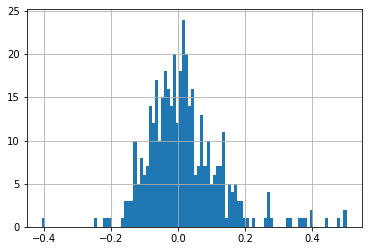

In [234]:
ftm_df['returns'].hist(bins=100)

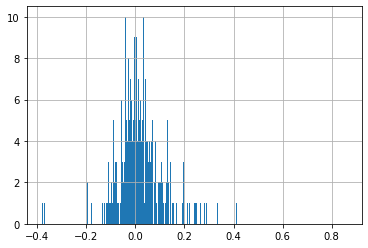

In [127]:
luna_terra_df['returns'].hist(bins=500)

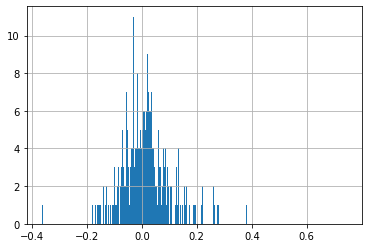

In [128]:
avax_df['returns'].hist(bins=500)

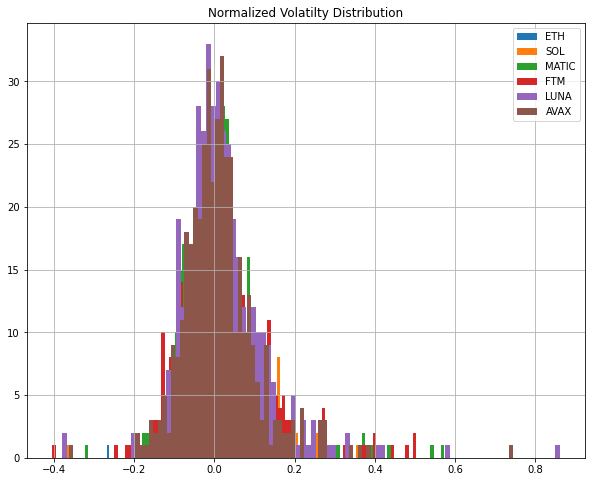

In [129]:
eth_df['returns'].hist(bins=100,label='ETH',figsize=(10,8))
sol_df['returns'].hist(bins=100,label='SOL',figsize=(10,8))
matic_df['returns'].hist(bins=100,label='MATIC',figsize=(10,8))
ftm_df['returns'].hist(bins=100,label='FTM',figsize=(10,8))
luna_terra_df['returns'].hist(bins=100,label='LUNA',figsize=(10,8))
avax_df['returns'].hist(bins=100,label='AVAX',figsize=(10,8))
plt.title('Normalized Volatilty Distribution')
plt.legend();

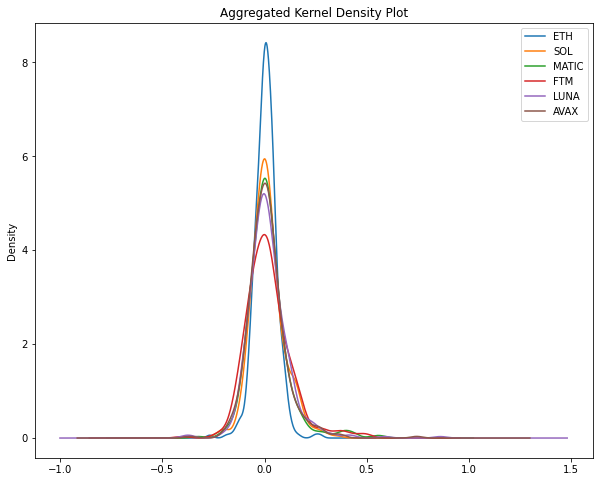

In [130]:
# Kernal Density Estimation Plot
eth_df['returns'].plot(kind='kde',label='ETH',figsize=(10,8))
sol_df['returns'].plot(kind='kde',label='SOL',figsize=(10,8))
matic_df['returns'].plot(kind='kde',label='MATIC',figsize=(10,8))
ftm_df['returns'].plot(kind='kde',label='FTM',figsize=(10,8))
luna_terra_df['returns'].plot(kind='kde',label='LUNA',figsize=(10,8))
avax_df['returns'].plot(kind='kde',label='AVAX',figsize=(10,8))
plt.title('Aggregated Kernel Density Plot')
plt.legend();

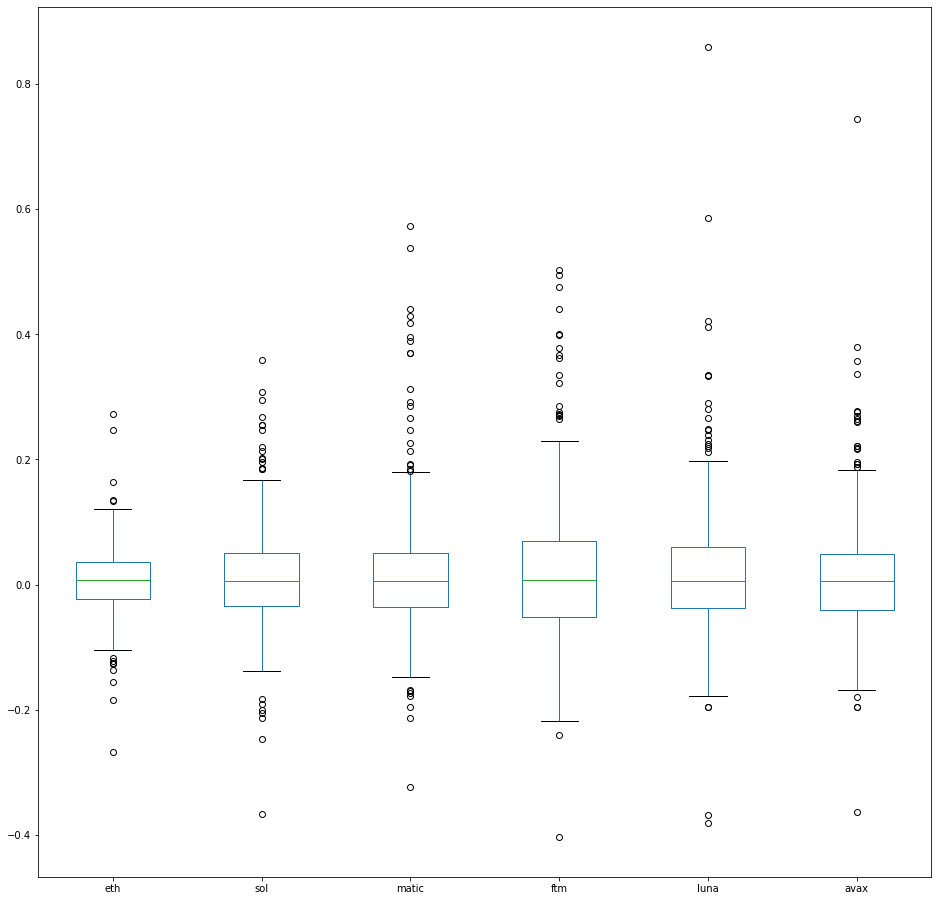

In [131]:
box_returns_df = pd.concat([eth_df['returns'],sol_df['returns'],matic_df['returns'],ftm_df['returns'],luna_terra_df['returns'],avax_df['returns']],axis=1)
box_returns_df.columns = protfolio_six_coins
box_returns_df.plot(kind='box',figsize=(16,16))

In [ ]:
# seaborn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbacd99b890>,
      dtype=object)

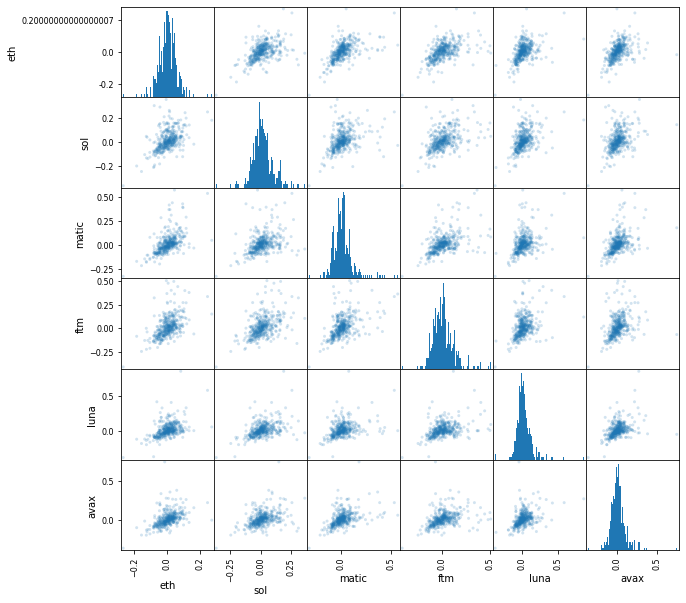

In [132]:
scatter_matrix(box_returns_df,figsize=(10,10),alpha=0.2,hist_kwds={'bins':100})

In [133]:
eth_df.head()

,Open,High,Low,Close,Volume,Market Cap,returns
Date,,,,,,,
2020-12-01,616.183534,634.754677,573.516677,589.814467,2.780131e+10,6.856145e+10,NaN
2020-12-02,586.970964,602.820207,578.508054,598.357253,2.929685e+10,6.742433e+10,0.014484
2020-12-03,598.537314,621.269532,588.649832,616.904853,1.884975e+10,6.886717e+10,0.030998
2020-12-04,616.551824,618.836053,569.723831,571.978333,1.857875e+10,6.789766e+10,-0.072826
2020-12-05,568.823975,596.047597,563.491212,595.548506,1.865798e+10,6.679529e+10,0.041208


In [134]:
eth_df['Normed Return'] = eth_df['Close'] / eth_df.iloc[0]['Close']
sol_df['Normed Return'] = sol_df['Close'] / sol_df.iloc[0]['Close']
matic_df['Normed Return'] = matic_df['Close'] / matic_df.iloc[0]['Close']
ftm_df['Normed Return'] = ftm_df['Close'] / ftm_df.iloc[0]['Close']
luna_terra_df['Normed Return'] = eth_df['Close'] / luna_terra_df.iloc[0]['Close']
avax_df['Normed Return'] = avax_df['Close'] / avax_df.iloc[0]['Close']


eth_df

,Open,High,Low,Close,Volume,Market Cap,returns,Normed Return
Date,,,,,,,,
2020-12-01,616.183534,634.754677,573.516677,589.814467,2.780131e+10,6.856145e+10,NaN,1.000000
2020-12-02,586.970964,602.820207,578.508054,598.357253,2.929685e+10,6.742433e+10,0.014484,1.014484
2020-12-03,598.537314,621.269532,588.649832,616.904853,1.884975e+10,6.886717e+10,0.030998,1.045930
2020-12-04,616.551824,618.836053,569.723831,571.978333,1.857875e+10,6.789766e+10,-0.072826,0.969760
2020-12-05,568.823975,596.047597,563.491212,595.548506,1.865798e+10,6.679529e+10,0.041208,1.009722
...,...,...,...,...,...,...,...,...
2022-01-12,3239.918200,3409.925100,3215.343755,3374.303800,2.211066e+10,3.934373e+11,0.042092,5.720958
2022-01-13,3373.881300,3409.041571,3248.202399,3256.141500,2.203296e+10,3.965815e+11,-0.035018,5.520620
2022-01-14,3245.768700,3334.329197,3202.761300,3314.714162,1.903904e+10,3.903704e+11,0.017988,5.619927


In [135]:
portfolio_six_weights=[0.40,0.20,0.15,0.10,0.10,0.05]
# ETH - 40%
# SOL = 20%
# MATIC = 15%
# FTM - 10%
# LUNA - 10%
# AVAX - 5%

list(zip((eth_df,sol_df,matic_df,ftm_df,luna_terra_df,avax_df),portfolio_six_weights))   

[(                   Open         High          Low        Close        Volume  \
  Date                                                                           
  2020-12-01   616.183534   634.754677   573.516677   589.814467  2.780131e+10   
  2020-12-02   586.970964   602.820207   578.508054   598.357253  2.929685e+10   
  2020-12-03   598.537314   621.269532   588.649832   616.904853  1.884975e+10   
  2020-12-04   616.551824   618.836053   569.723831   571.978333  1.857875e+10   
  2020-12-05   568.823975   596.047597   563.491212   595.548506  1.865798e+10   
  ...                 ...          ...          ...          ...           ...   
  2022-01-12  3239.918200  3409.925100  3215.343755  3374.303800  2.211066e+10   
  2022-01-13  3373.881300  3409.041571  3248.202399  3256.141500  2.203296e+10   
  2022-01-14  3245.768700  3334.329197  3202.761300  3314.714162  1.903904e+10   
  2022-01-15  3312.161663  3367.666120  3280.944130  3331.834267  1.521468e+10   
  2022-01-16  33

In [136]:
for coin_df, allo in zip((eth_df,sol_df,matic_df,ftm_df,luna_terra_df,avax_df),portfolio_six_weights):
    coin_df['Allocation'] = coin_df['Normed Return']*allo


In [137]:
eth_df.head()

,Open,High,Low,Close,Volume,Market Cap,returns,Normed Return,Allocation
Date,,,,,,,,,
2020-12-01,616.183534,634.754677,573.516677,589.814467,2.780131e+10,6.856145e+10,NaN,1.000000,0.400000
2020-12-02,586.970964,602.820207,578.508054,598.357253,2.929685e+10,6.742433e+10,0.014484,1.014484,0.405794
2020-12-03,598.537314,621.269532,588.649832,616.904853,1.884975e+10,6.886717e+10,0.030998,1.045930,0.418372
2020-12-04,616.551824,618.836053,569.723831,571.978333,1.857875e+10,6.789766e+10,-0.072826,0.969760,0.387904
2020-12-05,568.823975,596.047597,563.491212,595.548506,1.865798e+10,6.679529e+10,0.041208,1.009722,0.403889


In [138]:
sol_df.head()

,Open,High,Low,Close,Volume,Market Cap,returns,Normed Return,Allocation
Date,,,,,,,,,
2020-12-01,1.962367,2.124009,1.932501,1.977516,3.660476e+07,9.317730e+07,NaN,1.000000,0.200000
2020-12-02,1.971593,2.172160,1.958971,2.112355,4.113504e+07,9.605753e+07,0.068186,1.068186,0.213637
2020-12-03,2.114955,2.215764,2.080785,2.098405,5.240107e+07,9.900875e+07,-0.006604,1.061132,0.212226
2020-12-04,2.098405,2.110675,1.841711,1.856668,3.959888e+07,9.232912e+07,-0.115200,0.938889,0.187778
2020-12-05,1.851515,1.977514,1.827409,1.977440,3.075995e+07,8.849150e+07,0.065047,0.999961,0.199992


In [139]:
ftm_df.head()

,Open,High,Low,Close,Volume,Market Cap,returns,Normed Return,Allocation
Date,,,,,,,,,
2020-12-01,0.021029,0.023130,0.020284,0.020539,1.651956e+07,5.498381e+07,NaN,1.000000,0.100000
2020-12-02,0.020468,0.022986,0.020120,0.022646,1.459215e+07,5.454534e+07,0.102597,1.102597,0.110260
2020-12-03,0.022651,0.024370,0.022395,0.022888,1.778216e+07,5.895707e+07,0.010683,1.114376,0.111438
2020-12-04,0.022891,0.023116,0.020812,0.021042,1.551331e+07,5.587561e+07,-0.080657,1.024494,0.102449
2020-12-05,0.020936,0.022591,0.020684,0.022497,1.163651e+07,5.536606e+07,0.069141,1.095328,0.109533


In [150]:
# Start W/ 50mm
portfolio_usd_notional_value = 50000000
for coin_df in (eth_df,sol_df,matic_df,ftm_df,luna_terra_df,avax_df):
    coin_df['Position Values'] = coin_df['Allocation'] * portfolio_usd_notional_value

In [151]:
sol_df.head()

,Open,High,Low,Close,Volume,Market Cap,returns,Normed Return,Allocation,Position Values
Date,,,,,,,,,,
2020-12-01,1.962367,2.124009,1.932501,1.977516,3.660476e+07,9.317730e+07,NaN,1.000000,0.200000,1.000000e+07
2020-12-02,1.971593,2.172160,1.958971,2.112355,4.113504e+07,9.605753e+07,0.068186,1.068186,0.213637,1.068186e+07
2020-12-03,2.114955,2.215764,2.080785,2.098405,5.240107e+07,9.900875e+07,-0.006604,1.061132,0.212226,1.061132e+07
2020-12-04,2.098405,2.110675,1.841711,1.856668,3.959888e+07,9.232912e+07,-0.115200,0.938889,0.187778,9.388892e+06
2020-12-05,1.851515,1.977514,1.827409,1.977440,3.075995e+07,8.849150e+07,0.065047,0.999961,0.199992,9.999614e+06


In [152]:
ftm_df.head()

,Open,High,Low,Close,Volume,Market Cap,returns,Normed Return,Allocation,Position Values
Date,,,,,,,,,,
2020-12-01,0.021029,0.023130,0.020284,0.020539,1.651956e+07,5.498381e+07,NaN,1.000000,0.100000,5.000000e+06
2020-12-02,0.020468,0.022986,0.020120,0.022646,1.459215e+07,5.454534e+07,0.102597,1.102597,0.110260,5.512987e+06
2020-12-03,0.022651,0.024370,0.022395,0.022888,1.778216e+07,5.895707e+07,0.010683,1.114376,0.111438,5.571880e+06
2020-12-04,0.022891,0.023116,0.020812,0.021042,1.551331e+07,5.587561e+07,-0.080657,1.024494,0.102449,5.122469e+06
2020-12-05,0.020936,0.022591,0.020684,0.022497,1.163651e+07,5.536606e+07,0.069141,1.095328,0.109533,5.476639e+06


In [153]:
avax_df.head()

,Open,High,Low,Close,Volume,Market Cap,returns,Normed Return,Allocation,Position Values
Date,,,,,,,,,,
2020-12-01,3.704887,3.816191,3.511738,3.576271,3.049215e+07,8.937501e+07,NaN,1.000000,0.050000,2.500000e+06
2020-12-02,3.561117,3.844096,3.529078,3.745825,3.153232e+07,9.129669e+07,0.047411,1.047411,0.052371,2.618527e+06
2020-12-03,3.738596,3.889555,3.723324,3.819472,2.743838e+07,9.302110e+07,0.019661,1.068004,0.053400,2.670010e+06
2020-12-04,3.820087,3.865357,3.516727,3.556966,2.436822e+07,9.053740e+07,-0.068728,0.994602,0.049730,2.486505e+06
2020-12-05,3.534045,3.718005,3.513630,3.630332,2.445545e+07,8.940219e+07,0.020626,1.015117,0.050756,2.537791e+06


In [154]:
portfolio_val = pd.concat([eth_df['Position Values'], sol_df['Position Values'],matic_df['Position Values'],ftm_df['Position Values'], luna_terra_df['Position Values'],avax_df['Position Values']],axis=1)
portfolio_val.columns = protfolio_six_coins
portfolio_val

,eth,sol,matic,ftm,luna,avax
Date,,,,,,
2020-12-01,2.000000e+07,1.000000e+07,7.500000e+06,5.000000e+06,7.574184e+09,2.500000e+06
2020-12-02,2.028968e+07,1.068186e+07,7.749539e+06,5.512987e+06,7.683887e+09,2.618527e+06
2020-12-03,2.091861e+07,1.061132e+07,8.329154e+06,5.571880e+06,7.922069e+09,2.670010e+06
2020-12-04,1.939520e+07,9.388892e+06,7.557634e+06,5.122469e+06,7.345139e+09,2.486505e+06
2020-12-05,2.019444e+07,9.999614e+06,7.875701e+06,5.476639e+06,7.647819e+09,2.537791e+06
...,...,...,...,...,...,...
2022-01-12,1.144192e+08,7.668413e+08,9.560906e+08,7.138022e+08,4.333159e+10,6.700939e+07
2022-01-13,1.104124e+08,7.390267e+08,9.082184e+08,7.314119e+08,4.181419e+10,6.268883e+07
2022-01-14,1.123985e+08,7.397544e+08,9.371737e+08,7.200015e+08,4.256636e+10,6.309694e+07


In [155]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,eth,sol,matic,ftm,luna,avax,Total Pos
Date,,,,,,,
2020-12-01,2.000000e+07,1.000000e+07,7.500000e+06,5.000000e+06,7.574184e+09,2.500000e+06,7.619184e+09
2020-12-02,2.028968e+07,1.068186e+07,7.749539e+06,5.512987e+06,7.683887e+09,2.618527e+06,7.730740e+09
2020-12-03,2.091861e+07,1.061132e+07,8.329154e+06,5.571880e+06,7.922069e+09,2.670010e+06,7.970170e+09
2020-12-04,1.939520e+07,9.388892e+06,7.557634e+06,5.122469e+06,7.345139e+09,2.486505e+06,7.389090e+09
2020-12-05,2.019444e+07,9.999614e+06,7.875701e+06,5.476639e+06,7.647819e+09,2.537791e+06,7.693903e+09


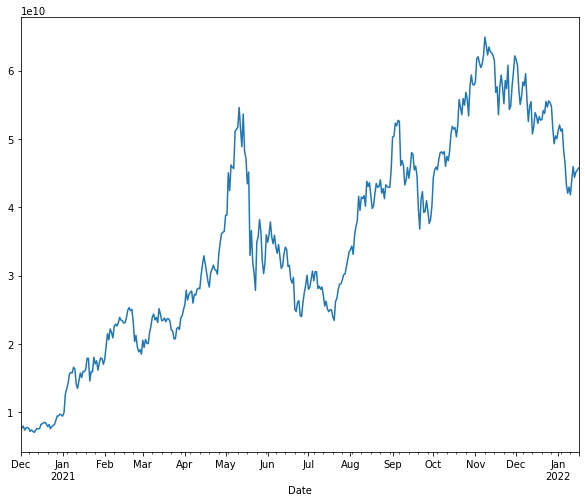

In [146]:
portfolio_val['Total Pos'].plot(figsize=(10,8))

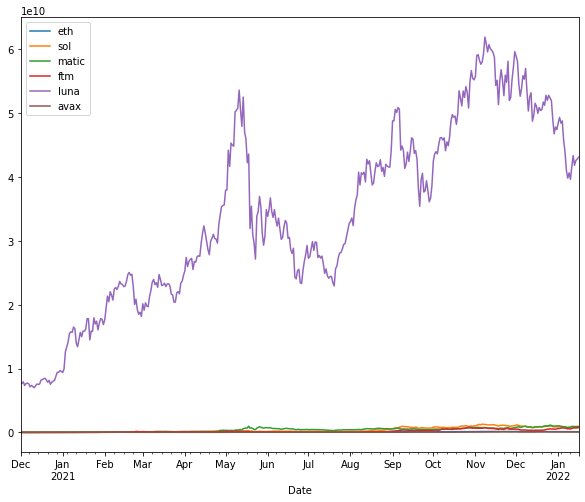

In [148]:
portfolio_val.drop('Total Pos',axis=1).plot(figsize=(10,8))

In [156]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [157]:
portfolio_val.head()

,eth,sol,matic,ftm,luna,avax,Total Pos,Daily Return
Date,,,,,,,,
2020-12-01,2.000000e+07,1.000000e+07,7.500000e+06,5.000000e+06,7.574184e+09,2.500000e+06,7.619184e+09,NaN
2020-12-02,2.028968e+07,1.068186e+07,7.749539e+06,5.512987e+06,7.683887e+09,2.618527e+06,7.730740e+09,0.014641
2020-12-03,2.091861e+07,1.061132e+07,8.329154e+06,5.571880e+06,7.922069e+09,2.670010e+06,7.970170e+09,0.030971
2020-12-04,1.939520e+07,9.388892e+06,7.557634e+06,5.122469e+06,7.345139e+09,2.486505e+06,7.389090e+09,-0.072907
2020-12-05,2.019444e+07,9.999614e+06,7.875701e+06,5.476639e+06,7.647819e+09,2.537791e+06,7.693903e+09,0.041252


In [158]:
portfolio_val['Daily Return'].mean()

0.005823889570943604

In [159]:
portfolio_val['Daily Return'].std()

0.053929531537572344

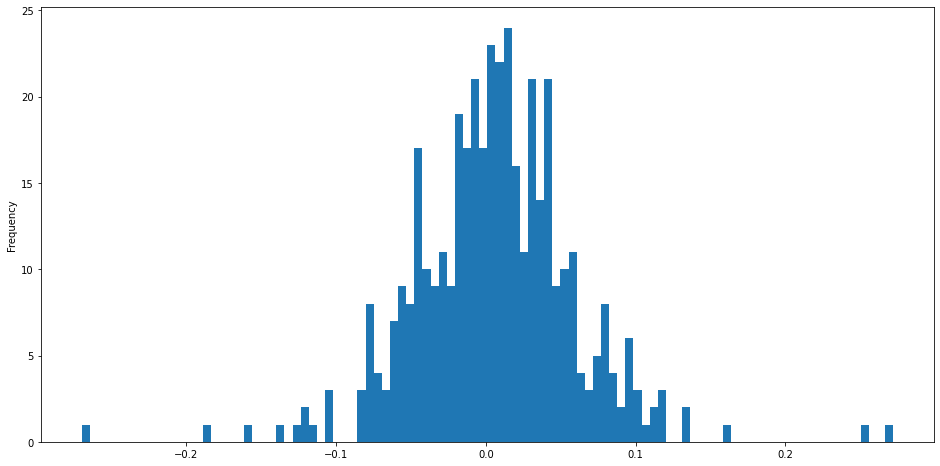

In [163]:
portfolio_val['Daily Return'].plot(kind='hist', bins=100,figsize=(16,8))

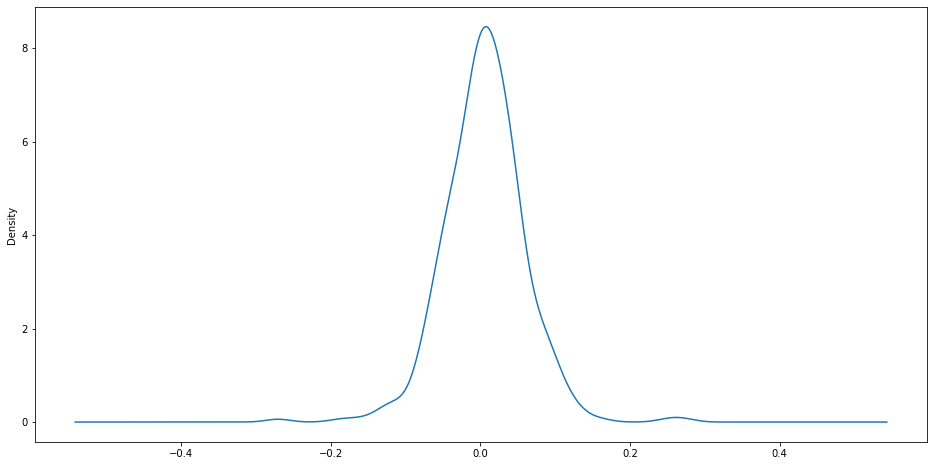

In [165]:
portfolio_val['Daily Return'].plot(kind='kde', figsize=(16,8))

In [166]:
cumuliative_return = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)
cumuliative_return

500.38338121711996

In [167]:
portfolio_val['Total Pos'][-1]

45744315092.72319

In [168]:
# apparently if you invested 50 million in dec of 2020 you would have 45 billion right now

In [170]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
SR

0.10799073169931281

In [171]:
len(eth_df)

412

In [173]:
#Annualized Sharpe Ratio
ASR  = (412**0.5) * SR
ASR

2.1919724521025854

In [174]:
# This is FUCKING CLEAN.

portfolio = pd.concat([eth_df['Close'],sol_df['Close'],matic_df['Close'],ftm_df['Close'],luna_terra_df['Close'],avax_df['Close']],axis=1)
portfolio.columns = protfolio_six_coins
portfolio

,eth,sol,matic,ftm,luna,avax
Date,,,,,,
2020-12-01,589.814467,1.977516,0.018725,0.020539,0.389358,3.576271
2020-12-02,598.357253,2.112355,0.019348,0.022646,0.406560,3.745825
2020-12-03,616.904853,2.098405,0.020795,0.022888,0.500521,3.819472
2020-12-04,571.978333,1.856668,0.018869,0.021042,0.452620,3.556966
2020-12-05,595.548506,1.977440,0.019663,0.022497,0.507713,3.630332
...,...,...,...,...,...,...
2022-01-12,3374.303800,151.644100,2.387033,2.932180,82.391900,95.857500
2022-01-13,3256.141500,146.143700,2.267512,3.004518,78.292500,89.676900
2022-01-14,3314.714162,146.287610,2.339803,2.957646,81.729617,90.260713


In [176]:
portfolio.pct_change(1).mean()

eth      0.005687
sol      0.013984
matic    0.016353
ftm      0.018237
luna     0.018151
avax     0.011993
dtype: float64

In [177]:
portfolio.pct_change(1).corr()

,eth,sol,matic,ftm,luna,avax
eth,1.000000,0.495412,0.556213,0.522936,0.466989,0.467794
sol,0.495412,1.000000,0.377341,0.474626,0.453674,0.409007
matic,0.556213,0.377341,1.000000,0.487062,0.371950,0.458446
ftm,0.522936,0.474626,0.487062,1.000000,0.385204,0.361270
luna,0.466989,0.453674,0.371950,0.385204,1.000000,0.420739
avax,0.467794,0.409007,0.458446,0.361270,0.420739,1.000000


In [180]:
# using log returns over arithmetic returns 
# log detrends or normalizes the time series
portfolio_log_returns = np.log(portfolio/portfolio.shift(1))
portfolio_log_returns.head()

,eth,sol,matic,ftm,luna,avax
Date,,,,,,
2020-12-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-02,0.014380,0.065962,0.032730,0.097669,0.043231,0.046321
2020-12-03,0.030527,-0.006626,0.072128,0.010626,0.207918,0.019470
2020-12-04,-0.075614,-0.122394,-0.097204,-0.084096,-0.100597,-0.071204
2020-12-05,0.040382,0.063019,0.041224,0.066855,0.114864,0.020416


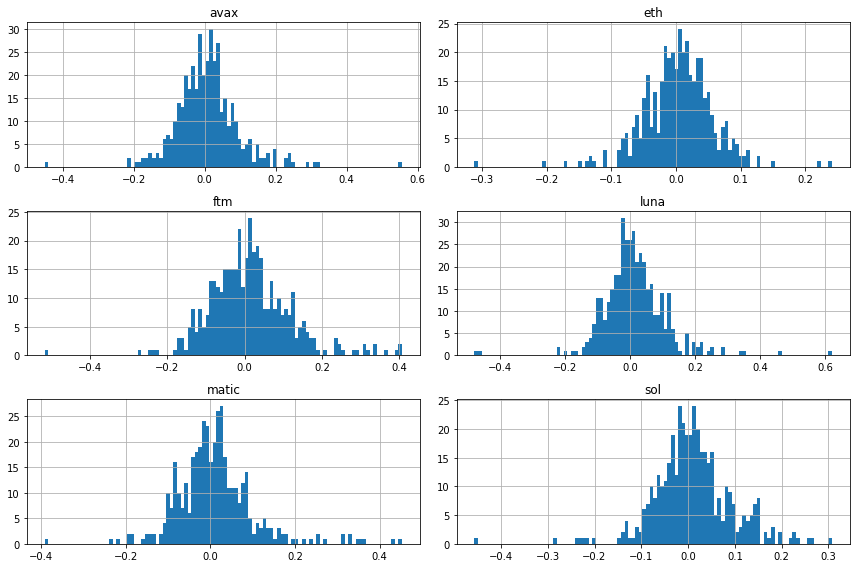

In [181]:
portfolio_log_returns.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [182]:
portfolio_log_returns.mean()

eth      0.004229
sol      0.010498
matic    0.011738
ftm      0.012363
luna     0.013163
avax     0.007909
dtype: float64

In [186]:
# Annulized for time period
portfolio_log_returns.cov() * 365

,eth,sol,matic,ftm,luna,avax
eth,1.061969,0.859549,1.090139,1.169025,0.969595,0.906466
sol,0.859549,2.488453,1.182471,1.626274,1.456190,1.182787
matic,1.090139,1.182471,3.169592,1.878246,1.363319,1.521746
ftm,1.169025,1.626274,1.878246,4.103308,1.607886,1.447777
luna,0.969595,1.456190,1.363319,1.607886,3.438396,1.470322
avax,0.906466,1.182787,1.521746,1.447777,1.470322,2.870634


In [191]:
np.random.seed(101)
weights = np.array(np.random.random(6))
weights = weights/np.sum(weights)
weights, sum(weights)

(array([0.18401825, 0.20335695, 0.01014677, 0.06112161, 0.24419792,
        0.2971585 ]),
 1.0000000000000002)

In [193]:
expected_return = np.sum(portfolio_log_returns.mean() * weights * 365)
expected_return

3.4135971119651707

In [195]:
expected_volatility = np.sqrt(np.dot(weights.T, np.dot(portfolio_log_returns.cov() * 365, weights)))
expected_volatility

1.2486603775027545

In [196]:
sharpe_ratio = expected_return / expected_volatility
sharpe_ratio

2.7338075056022513

In [203]:
# monte carlo 
    
TOTAL_RUNS = 50000
all_weights = np.zeros((TOTAL_RUNS,len(protfolio_six_coins)))
all_returns = np.zeros(TOTAL_RUNS)
all_vols = np.zeros(TOTAL_RUNS)
all_sharpes = np.zeros(TOTAL_RUNS)

for ind in range(TOTAL_RUNS):
    w = np.array(np.random.random(6))
    w = w/np.sum(w)
    all_weights[ind,:] = w
    
    all_returns[ind] = np.sum(portfolio_log_returns.mean() * w * 365)
    
    all_vols[ind] = np.sqrt(np.dot(w.T, np.dot(portfolio_log_returns.cov() * 365, w)))
    
    all_sharpes[ind] = all_returns[ind] / all_vols[ind]



In [204]:
all_sharpes.max()

3.1403040945389407

In [205]:
all_sharpes.argmax()

5615

In [206]:
all_weights[32,:]

array([0.08903565, 0.23651822, 0.45594924, 0.01072993, 0.01585113,
       0.19191584])

In [207]:
max_sr_ret = all_returns[int(all_sharpes.argmax())]
max_sr_vol = all_vols[int(all_sharpes.argmax())]

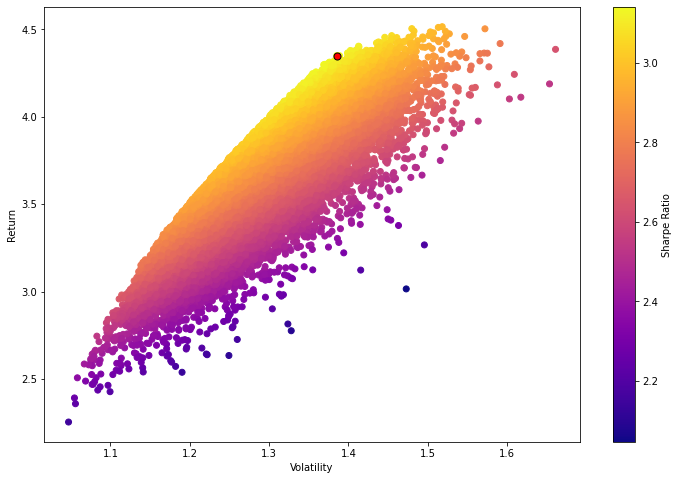

In [212]:
plt.figure(figsize=(12,8))
plt.scatter(all_vols,all_returns,c=all_sharpes,cmap='plasma')
#plt.hlines(y=0.01,xmin=0,xmax=2)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol,max_sr_ret, c='red',s=50,edgecolors='black')

In [216]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(portfolio_log_returns.mean() * weights) * 365
    vol = np.sqrt(np.dot(weights.T, np.dot(portfolio_log_returns.cov() * 365, weights)))
    sr = ret / vol
    return np.array([ret,vol,sr])

def negative_sharpe(weights):
    return -1 * get_ret_vol_sr(weights)[2]

def check_sum(weights):
    return np.sum(weights) - 1

In [215]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

In [217]:
 constraints = {
                    'type': 'eq',
                    'fun': check_sum             
                  }

In [221]:
bounds = tuple((0,1) for _ in range(6))
bounds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [222]:
init_guess = portfolio_six_weights
init_guess

[0.4, 0.2, 0.15, 0.1, 0.1, 0.05]

In [224]:
opt_results = minimize(fun=negative_sharpe,
                      x0=init_guess,
                      method='SLSQP',
                       bounds = bounds,
                       constraints= constraints
                      )
opt_results

     fun: -3.1534678047734617
     jac: array([ 5.27215123e-01,  3.80873680e-05,  3.18735838e-04,  1.12685561e-03,
       -6.94930553e-04,  2.27718085e-01])
 message: 'Optimization terminated successfully.'
    nfev: 58
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([5.03057875e-18, 2.71897664e-01, 2.79360786e-01, 1.16612131e-01,
       3.32129420e-01, 7.09070190e-17])

In [225]:
opt_results.x

array([5.03057875e-18, 2.71897664e-01, 2.79360786e-01, 1.16612131e-01,
       3.32129420e-01, 7.09070190e-17])

In [226]:
get_ret_vol_sr(opt_results.x)

array([4.36056739, 1.38278481, 3.1534678 ])

In [227]:
# efficient frontier - highest expected return, lowest risk possible for given expected return
frontier_y = np.linspace(2,5,1000)

In [228]:
def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]


In [229]:
frontier_vol = []

for possible_return in frontier_y:
    cons = ({'type':'eq','fun': check_sum}, 
            {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0] - possible_return})
    result = minimize(minimize_vol, init_guess, method='SLSQP', bounds=bounds, constraints=cons)
    frontier_vol.append(result['fun'])
    
    

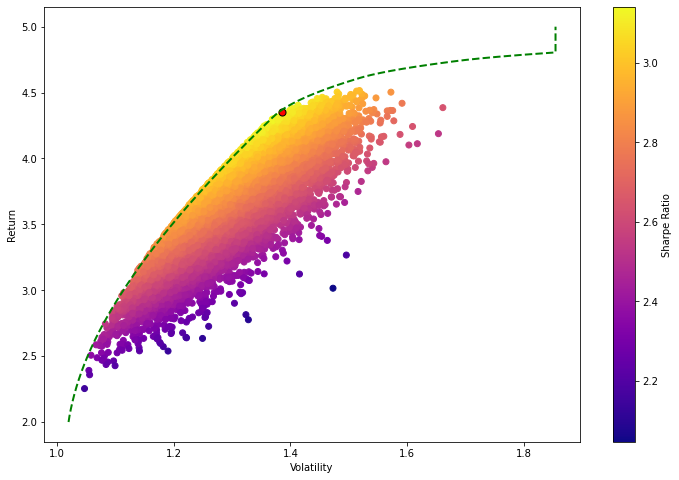

In [230]:
plt.figure(figsize=(12,8))
plt.scatter(all_vols,all_returns,c=all_sharpes,cmap='plasma')
#plt.hlines(y=0.01,xmin=0,xmax=2)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_vol, frontier_y,'g--',linewidth=2)
plt.scatter(max_sr_vol,max_sr_ret, c='red',s=50,edgecolors='black')